In [1]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('All.csv')

df = df.drop(df.columns[[0, 1, 35, 36]], axis=1)

df

/var/folders/5h/fmmpw8js0x33q9xzkn0b94z00000gn/T/ipykernel_4815/1766496808.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('All.csv')


,SMILES,HOMO,LUMO,Molecular Weight,Heavy Atom Molecular Weight,Max Absolute Partial Charge,Max Partial Charge,Min Abs Partial Charge,Min Partial Charge,Radical Electrons,...,Saturated Carbocycles,Saturated Heterocycles,H Count,C Count,N Count,F Count,Halogen Count,Double Bonds,Triple Bonds,Group
0,Cc1ccc(-c2c3cc(-c4ccc(-c5sc(-c6cccs6)c6cc(S(C)...,-0.1700,-0.1180,763.162,740.986,0.223158,0.184422,0.184422,-0.223158,0,...,0,0,22,35,0,0,0,2,0,1
1,CN1c2ccccc2C(=C2c3ccc(-c4cccs4)cc3N(C)C2=O)C1=O\n,-0.1830,-0.1350,372.449,356.321,0.310764,0.259055,0.259055,-0.310764,0,...,0,0,16,22,2,0,0,3,0,1
2,Cc1cc(-c2cc3c4nsnc4c(-c4cc(C)c(-c5cccs5)s4)cc3...,-0.1730,-0.1330,600.866,584.738,0.172251,0.113593,0.113593,-0.172251,0,...,0,0,16,28,4,0,0,0,0,1
3,Cn1c2ccccc2c2ccc(-c3ccc(-c4ccc(C5=C(c6ccccc6)C...,-0.1580,-0.1120,770.158,734.878,0.343591,0.117083,0.117083,-0.343591,0,...,0,0,35,47,1,0,0,2,0,1
4,Cc1cc(-c2c3cc(-c4cccs4)sc3c(-c3cc(C)c(C)s3)c3c...,-0.1700,-0.1370,899.194,866.938,0.308118,0.259140,0.259140,-0.308118,0,...,0,0,32,48,2,2,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52678,O=[W](=O)=O,-11.4918,-3.5168,231.837,231.837,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,3,0,4
52679,Cc1c(F)c(=C(C#N)C#N)c(F)c(F)c1=C(C#N)C#N,-9.1965,-3.5970,272.189,269.165,0.205833,0.171281,0.171281,-0.205833,0,...,0,0,3,13,4,3,3,2,4,4
52680,COC(=O)C(C#N)=c1c(F)c(F)c(=C(C#N)C#N)c(F)c1F,-9.2273,-3.6334,309.178,306.154,0.464876,0.348956,0.348956,-0.464876,0,...,0,0,3,13,3,4,4,3,3,4
52681,[C-]#[N+]C(C#N)=c1c(F)c(F)c(=C(C#N)C(=O)OCC(C)...,-9.0708,-3.4558,407.367,390.231,0.461271,0.349242,0.349242,-0.461271,0,...,0,0,17,20,3,4,4,3,3,4


In [3]:
data = df

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns

X_meaned = StandardScaler().fit_transform(X)

In [4]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [5]:
principalDf

,principal component 1,principal component 2
0,328.089913,-37.085066
1,-225.840476,19.760150
2,99.021129,-20.409638
3,337.425177,-4.817186
4,525.299150,-24.669109
...,...,...
52621,-711.664699,32.492839
52622,-364.189190,13.846103
52623,-310.184792,10.859824
52624,-173.742246,22.410132


In [6]:
data['Group'] = data['Group'].reset_index(drop=True)
data['Group']

/var/folders/5h/fmmpw8js0x33q9xzkn0b94z00000gn/T/ipykernel_4815/4154206596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Group'] = data['Group'].reset_index(drop=True)


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
52677    NaN
52679    NaN
52680    NaN
52681    NaN
52682    NaN
Name: Group, Length: 52626, dtype: float64

In [7]:
y = y.reset_index(drop=True)
y

0       -0.1180
1       -0.1350
2       -0.1330
3       -0.1120
4       -0.1370
          ...  
52621   -3.0066
52622   -3.5970
52623   -3.6334
52624   -3.4558
52625    0.5733
Name: LUMO, Length: 52626, dtype: float64

In [8]:
finalDf = pd.concat([principalDf, y, data['Group']], axis = 1)
finalDf = finalDf.dropna()
finalDf

,principal component 1,principal component 2,LUMO,Group
0,328.089913,-37.085066,-0.1180,1.0
1,-225.840476,19.760150,-0.1350,1.0
2,99.021129,-20.409638,-0.1330,1.0
3,337.425177,-4.817186,-0.1120,1.0
4,525.299150,-24.669109,-0.1370,1.0
...,...,...,...,...
52621,-711.664699,32.492839,-3.0066,4.0
52622,-364.189190,13.846103,-3.5970,4.0
52623,-310.184792,10.859824,-3.6334,4.0
52624,-173.742246,22.410132,-3.4558,4.0


In [9]:
finalDf['Group'].astype(str)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
52621    4.0
52622    4.0
52623    4.0
52624    4.0
52625    4.0
Name: Group, Length: 52571, dtype: object

0         True
1         True
2         True
3         True
4         True
         ...  
52621    False
52622    False
52623    False
52624    False
52625    False
Name: Group, Length: 52571, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
52621    False
52622    False
52623    False
52624    False
52625    False
Name: Group, Length: 52571, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
52621    False
52622    False
52623    False
52624    False
52625    False
Name: Group, Length: 52571, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
52621     True
52622     True
52623     True
52624     True
52625     True
Name: Group, Length: 52571, dtype: bool


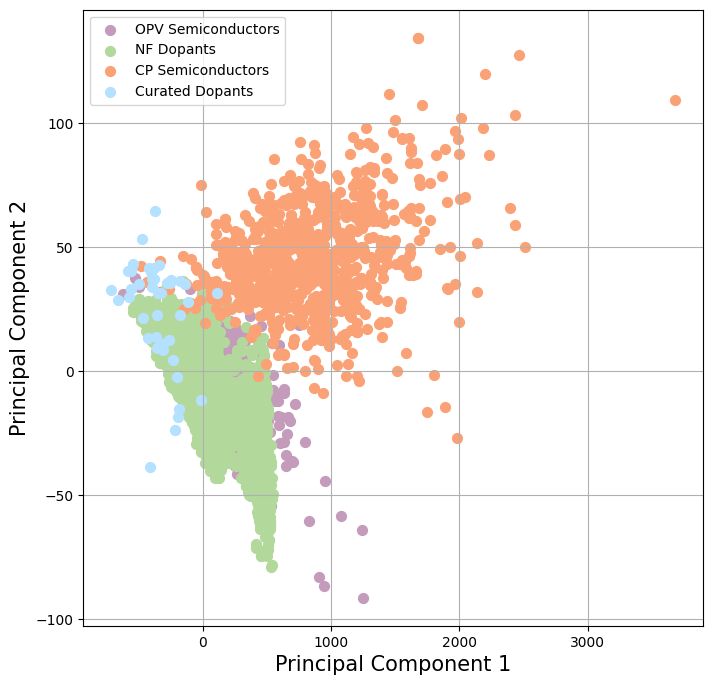

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = ['1.0', '2.0', '3.0', '4.0']
colors = ['#C49BBB', '#B3D89C', '#FAA275', '#B4E1FF']
for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['Group'].astype(str)
    print(indicesToKeep)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['OPV Semiconductors', 'NF Dopants', 'CP Semiconductors', 'Curated Dopants'])
ax.grid()

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = StandardScaler().fit_transform(X)

principal_comp = pca.fit_transform(X)

principal_df = pd.DataFrame(data = principal_comp, columns = ['principal component 1', 'principal component 2'])

final_df = pd.concat([principal_df, y], axis = 1)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.2336817 , 0.16547615])

Text(0, 0.5, 'Frequency')

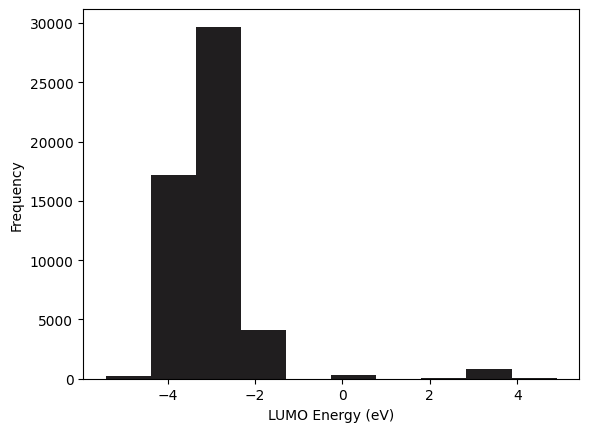

In [12]:
fig, ax = plt.subplots(1, 1) 
ax.hist(y, color = '#201E1F')
ax.set_xlabel('LUMO Energy (eV)')
ax.set_ylabel('Frequency')

/var/folders/5h/fmmpw8js0x33q9xzkn0b94z00000gn/T/ipykernel_4815/1931186906.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Group'] = data['Group'].reset_index(drop=True)


0         True
1         True
2         True
3         True
4         True
         ...  
52621    False
52622    False
52623    False
52624    False
52625    False
Name: Group, Length: 52571, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
52621    False
52622    False
52623    False
52624    False
52625    False
Name: Group, Length: 52571, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
52621    False
52622    False
52623    False
52624    False
52625    False
Name: Group, Length: 52571, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
52621     True
52622     True
52623     True
52624     True
52625     True
Name: Group, Length: 52571, dtype: bool


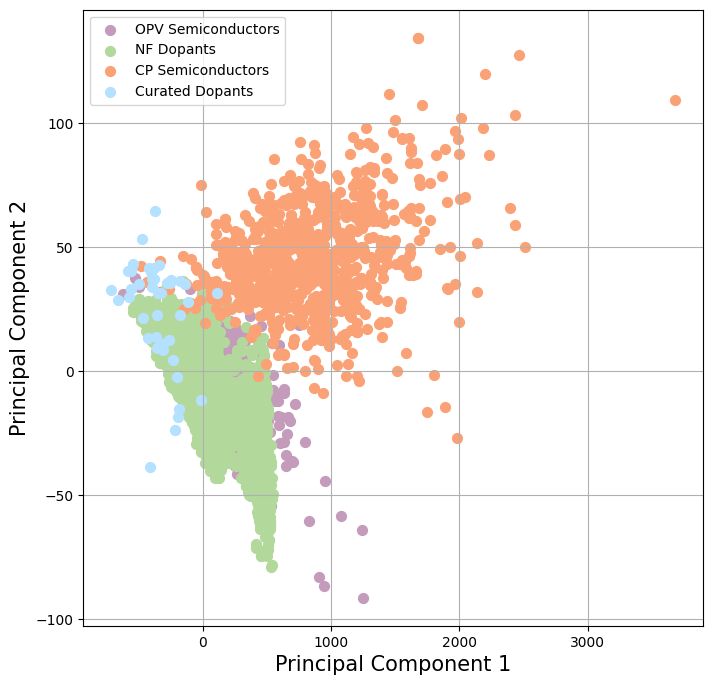

In [13]:
data = df

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

y = data['HOMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns

X_meaned = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

data['Group'] = data['Group'].reset_index(drop=True)

y = y.reset_index(drop=True)

finalDf = pd.concat([principalDf, y, data['Group']], axis = 1)
finalDf = finalDf.dropna()
finalDf['Group'].astype(str)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = ['1.0', '2.0', '3.0', '4.0']
colors = ['#C49BBB', '#B3D89C', '#FAA275', '#B4E1FF']
for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['Group'].astype(str)
    print(indicesToKeep)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['OPV Semiconductors', 'NF Dopants', 'CP Semiconductors', 'Curated Dopants'])
ax.grid()